# Learning Curve

### Linear Model

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define X data (bias + weigths)
def define_X_include_bias(X):
    X_b = np.c_[np.zeros((len(X), 1)), X]
    return X_b

# Normal Equation
def normalEquation(X, y):
    optimized_weights = np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y)) # w = (XT * X)^-1 * (XT * y)
    return optimized_weights

# Linear Regression
def linearRegression(X, W):
    return np.dot(X, W)

def meanModel(models):
    return np.mean(models, axis=0) 

def costFunction(n_samples, y_pred, y):                     # Mean Sqaure Error (MSE)
    return np.mean((y_pred - y) ** 2)

In [7]:
# Define the function
def problem(X):
    epsilon = np.random.randn(len(X)) * 0.3  # Noise with standard deviation of 0.3
    return np.sin(np.pi * X) + epsilon

(100,)
(100, 2)


(-2.0, 2.0)

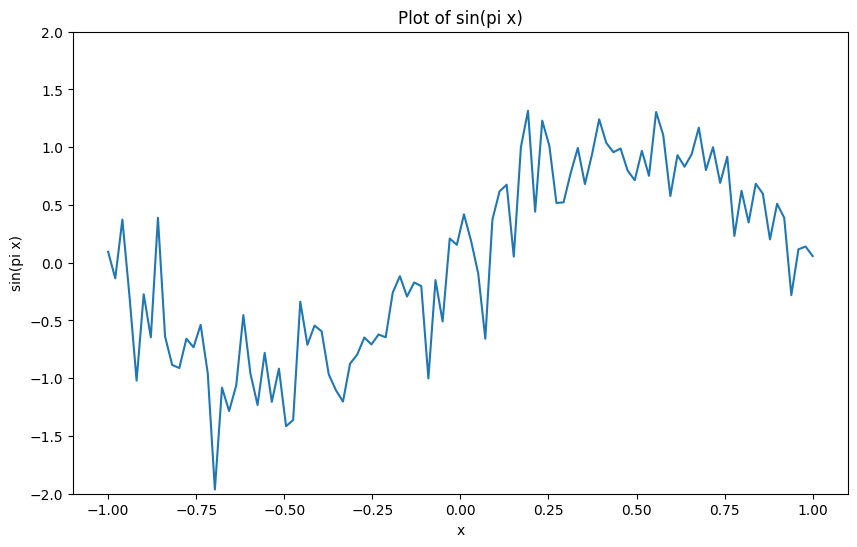

In [8]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Define X data (bias + weigths)
X_include_bias = define_X_include_bias(X)
print(X_include_bias.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

In [9]:
sample_size_sets = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# every value from dataset that possible
E_in = [[] for _ in range(len(sample_size_sets))]
E_d = [[] for _ in range(len(sample_size_sets))]
E_out_all = []


for i in range(len(sample_size_sets)):
    for _ in range(1000):
        # random i values from problem dataset
        rands_X = np.random.choice(X, sample_size_sets[i])
        y_sample = problem(rands_X)

        X_sample = define_X_include_bias(rands_X)

        W = normalEquation(X_sample, y_sample)
        
        # for calculate E_out
        y_pred_validation = linearRegression(X=X_include_bias, W=W)
        E_d[i].append(y_pred_validation)
        
        # for calculate E_in
        y_pred_training = linearRegression(X=X_sample, W=W)
        E_in[i].append(costFunction(sample_size_sets[i], y_pred=y_pred_training, y=y_sample))

    mean_model = meanModel(np.array(E_d[i]))
    print("Sample Size: ", sample_size_sets[i])
    z = np.square(mean_model - y)
    bias = np.mean(z)
    print(f"Bias: {bias}")
    
    z = np.square(E_d[i] - mean_model)
    var_x = np.mean(z)
    variance = np.mean(var_x)
    print(f"Variance: {variance}")
    
    E_out = bias + variance + (0.3 ** 2)
    print(f"E_out: {E_out}\n")
    E_out_all.append(E_out)


E_in_all = []
for i in range(len(E_in)):
    E_in_all.append(np.mean(E_in[i]))

print(np.array(E_in_all))
print(np.array(sample_size_sets).shape)


Sample Size:  2
Bias: 0.3506579967811249
Variance: 0.35500964813189484
E_out: 0.7956676449130197

Sample Size:  10
Bias: 0.3072662071030217
Variance: 0.04634279201821697
E_out: 0.44360899912123863

Sample Size:  20
Bias: 0.3069814151033727
Variance: 0.018340029152929656
E_out: 0.41532144425630235

Sample Size:  30
Bias: 0.3069965523966276
Variance: 0.012711143478384684
E_out: 0.4097076958750123

Sample Size:  40
Bias: 0.3071375088778144
Variance: 0.008679437664795252
E_out: 0.4058169465426096

Sample Size:  50
Bias: 0.3071967276579705
Variance: 0.007124966114389447
E_out: 0.40432169377235994

Sample Size:  60
Bias: 0.30726431819794553
Variance: 0.006297179747658597
E_out: 0.40356149794560414

Sample Size:  70
Bias: 0.30730219656549784
Variance: 0.0052037562472336445
E_out: 0.4025059528127315

Sample Size:  80
Bias: 0.30731294292946454
Variance: 0.004399132635541776
E_out: 0.4017120755650063

Sample Size:  90
Bias: 0.30734857015106726
Variance: 0.00382336337525226
E_out: 0.4011719335263

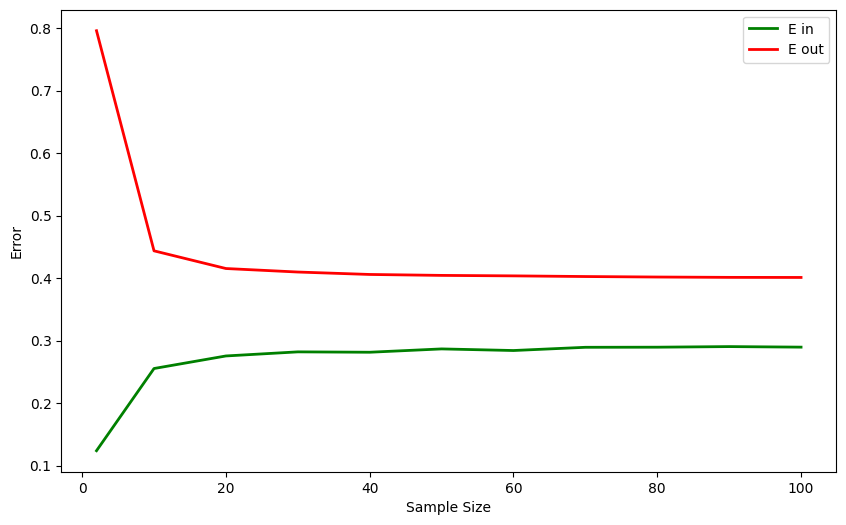

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(sample_size_sets, E_in_all, label='E in', c="green", linewidth=2.0)
plt.plot(sample_size_sets, E_out_all, label='E out', c="red", linewidth=2.0)
plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.legend()
plt.show()